In [4]:
# Shor's algorithm 
#Find the Modular Operations Cycles of 15 to 11

from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit. visualization import *
import math

In [6]:
shor15=QuantumCircuit(5,3)
shor15.h(0)
shor15.h(1)
shor15.h(2)
shor15.cx(2,3)
shor15.cx(2,4)
shor15.h(1)
shor15.cu1(math.pi/2,1,0)
shor15.h(0)
shor15.cu1(math.pi/4,1,2)
shor15.cu1(math.pi/2,0,2)
shor15.h(2)
shor15.measure([0,1,2],[0,1,2])
shor15.draw()

{'000': 520, '100': 504}


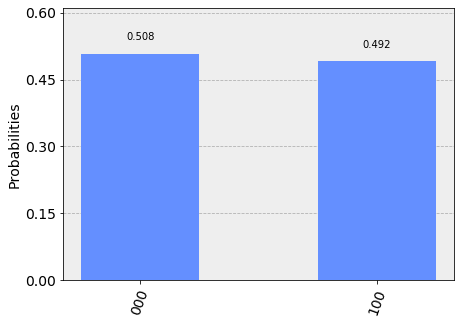

In [7]:
backend=BasicAer.get_backend('qasm_simulator')
job=execute(shor15,backend,shots=1024)

measure_result=job.result().get_counts(shor15)
print(measure_result)
plot_histogram(measure_result)

In [9]:
# Find period
period_15_11=len(measure_result)
print(period_15_11)

2


In [17]:
#Find gcm

def gcm(a,b):
    if a<b:
        (a,b)=(b,a)
    while b!=0:
        (a,b)=(b,a%b)
    return a

In [19]:
#Find prime number
prime_15_1=gcm((11**(period_15_11/2))-1,15)
prime_15_2=gcm((11**(period_15_11/2))+1,15)
print(prime_15_1)
print(prime_15_2)

5.0
3.0
